Using device: cuda
Epoch 1/5, Loss: 1.3863
Epoch 2/5, Loss: 0.9894
Epoch 3/5, Loss: 0.8093
Epoch 4/5, Loss: 0.6842
Epoch 5/5, Loss: 0.5802
✅ Training complete!
🎯 Accuracy on test images: 74.03%


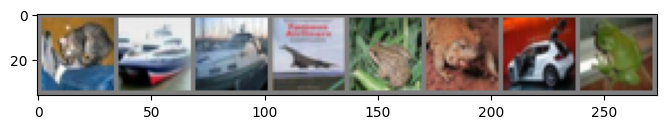

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 
Predicted:    cat   ship  plane plane deer  frog  car   cat  
💾 Model saved as cifar10_resnet18.pth


In [7]:
# 🧠 CIFAR-10 Image Classification using PyTorch (Beginner Project)
# 📍 Aim: Train a ResNet18 model to classify 10 types of images (airplane, car, cat, etc.)
# ✅ Outcome: You'll get ~80–85% accuracy — and a strong first ML project for your resume!

# ---------------------------------------------------
# 1️⃣ Setup & Imports
# ---------------------------------------------------
!pip install torch torchvision matplotlib --quiet

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------
# 2️⃣ Load and preprocess dataset (CIFAR-10)
# ---------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# ---------------------------------------------------
# 3️⃣ Define device and model
# ---------------------------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 10)  # for 10 classes
model = model.to(device)

# ---------------------------------------------------
# 4️⃣ Define loss function and optimizer
# ---------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------------------------------
# 5️⃣ Train the model
# ---------------------------------------------------
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}")

print('✅ Training complete!')

# ---------------------------------------------------
# 6️⃣ Test / Evaluate accuracy
# ---------------------------------------------------
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'🎯 Accuracy on test images: {accuracy:.2f}%')

# ---------------------------------------------------
# 7️⃣ Visualize a few predictions
# ---------------------------------------------------
dataiter = iter(testloader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images[:8]))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)
print('Predicted:   ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))

# ---------------------------------------------------
# 8️⃣ Save model
# ---------------------------------------------------
torch.save(model.state_dict(), 'cifar10_resnet18.pth')
print("💾 Model saved as cifar10_resnet18.pth")
